In [2]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [3]:
from easyesn.optimizers import GradientOptimizer
from easyesn import PredictionESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import matplotlib.pyplot as plt


In [4]:
inputLength = 1000
data = np.sin(np.linspace(0, 4*np.pi, inputLength)).reshape(-1,1)
targetData = np.roll(data, -1)

inputData = data[:int(inputLength*0.7)]
validationData = data[int(inputLength*0.3):]

inputTarget = targetData[:int(inputLength*0.7)]
validationTarget = targetData[int(inputLength*0.3):]

In [5]:
esn = PredictionESN(n_input=1, n_output=1, n_reservoir=50, regression_parameters=[1e-2], solver="lsqr")

## GradientOptimizer

In [6]:
opt = GradientOptimizer(esn, learningRate=0.001)

In [7]:
validationLosses, fitLosses, spectralRadiuses, leakingRates, inputScalings = opt.optimizeParameterForTrainError(inputData, inputTarget, validationData, validationTarget, epochs=150, transientTime=100)

100% (150 of 150) |##################################################################################################################################################################################| Elapsed Time: 0:00:21 Time: 0:00:21


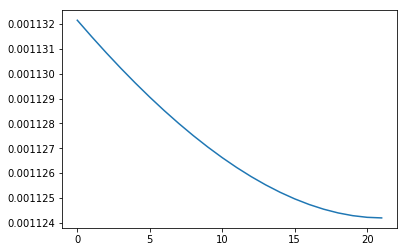

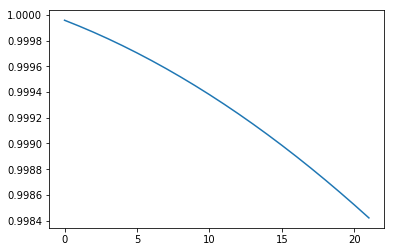

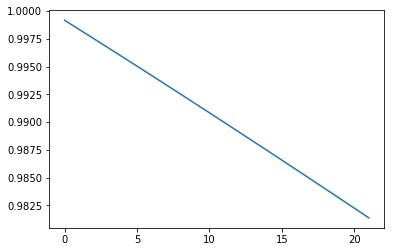

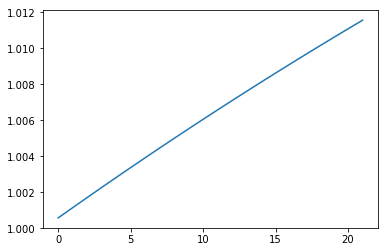

In [9]:
plt.plot(fitLosses)
plt.show()
plt.plot(spectralRadiuses)
plt.show()
plt.plot(leakingRates)
plt.show()
plt.plot(inputScalings)
plt.show()

## GridSearchOptimizer

In [12]:
a,b,c, _= (1,2,3)

ValueError: not enough values to unpack (expected 4, got 3)